# Part 1

## 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

data = np.loadtxt("atlas_z_to_ll.csv", delimiter=",", skiprows=1)

## 2.

In [2]:
energy = data[:,6] + data[:,7]
px = data[:,0] * np.cos(data[:,4]) + data[:,1] * np.cos(data[:,5])
py = data[:,0] * np.sin(data[:,4]) + data[:,1] * np.sin(data[:,5])
pz = data[:,0] * np.sinh(data[:,2]) + data[:,1] * np.sinh(data[:,3])
mass = np.sqrt(energy**2 - (px**2 + py**2 + pz**2))

## 3.

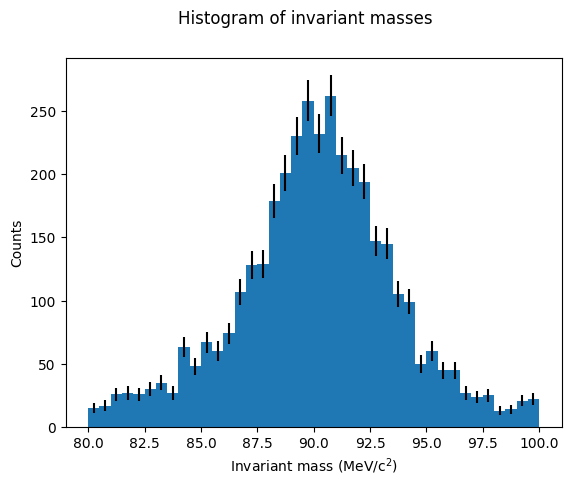

In [3]:
fig, ax = plt.subplots()
out = ax.hist(mass, bins = np.linspace(80,100,41))
centers = 0.5 * (out[1][1:] + out[1][:-1])
ax.errorbar(centers, out[0], yerr=np.sqrt(out[0]), fmt=",k")
ax.set_xlabel("Invariant mass (MeV/c$^2$)")
ax.set_ylabel("Counts")
fig.suptitle("Histogram of invariant masses");

# Part 2

## 1.

In [4]:
def D(m, m0, gamma):
    return (1/np.pi) * (gamma/2) / ((m - m0)**2 + (gamma/2)**2)

## 2.

In [5]:
def new_D(m, m0, gamma):
    return (5000/2)*D(m, m0, gamma)
start_index = int((87 - 80) / 0.5)
end_index = int((93 - 80) / 0.5)
params, cov = scipy.optimize.curve_fit(new_D, centers[start_index : end_index], out[0][start_index : end_index])

In [6]:
chi = 0
for i in range(start_index, end_index):
    chi += (new_D(centers[i], *params) - out[0][i])**2 / out[0][i]

print("Chi-square: ", chi)
print("Reduced chi-square: ", chi / (end_index - start_index - len(params)))
print("P-value: ", scipy.stats.chi2.sf(chi, end_index - start_index - len(params)))

Chi-square:  10.080401834380586
Reduced chi-square:  1.0080401834380586
P-value:  0.43346791849121963


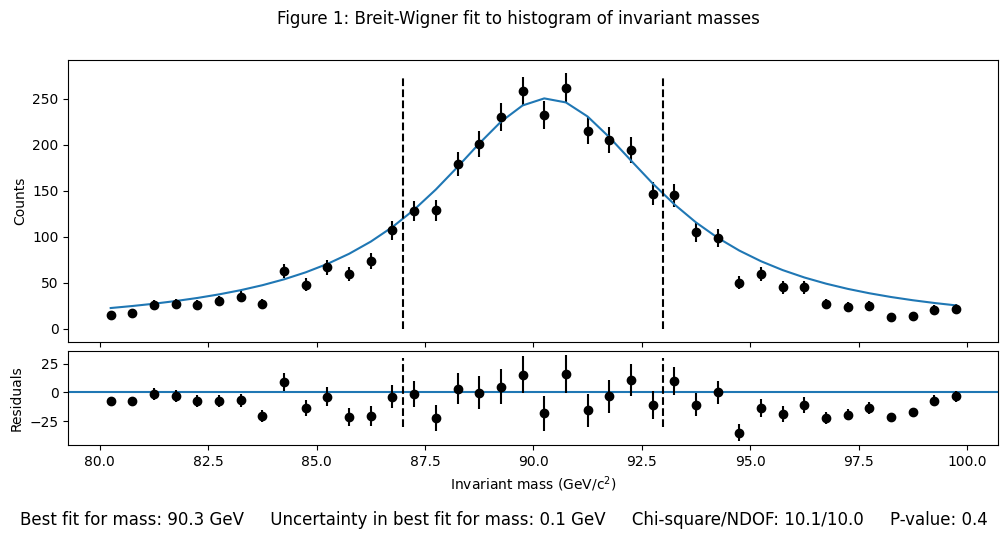

In [7]:
fig, (at, ab) = plt.subplots(2, 1, sharex=True, figsize=(12,5), gridspec_kw={"height_ratios": [3,1], "hspace": 0.05})
at.errorbar(centers, out[0], yerr=np.sqrt(out[0]), fmt="ok")
at.plot(centers, new_D(centers, *params))
ab.axhline(0)
at.vlines([87, 93], 0, 275, "k", linestyle="--")
ab.vlines([87, 93], -30, 30, "k", linestyle="--")
ab.errorbar(centers, out[0] - new_D(centers, *params), yerr=np.sqrt(out[0]), fmt="ok")
fig.text(0.085, -.05, f"Best fit for mass: {params[0]:.1f} GeV     Uncertainty in best fit for mass: {np.sqrt(cov[0][0]):.1f} GeV     Chi-square/NDOF: {chi:.1f}/{end_index - start_index - len(params):.1f}     P-value: {scipy.stats.chi2.sf(chi, end_index - start_index - len(params)):.1f}", fontsize=12)
ab.set_xlabel("Invariant mass (GeV/c$^2$)")
ab.set_ylabel("Residuals")
at.set_ylabel("Counts")
fig.suptitle("Figure 1: Breit-Wigner fit to histogram of invariant masses");

In [8]:
print("Best-fit mass m_0:", params[0])
print("Uncertainty in best-fit mass m_0:", np.sqrt(cov[0][0]))

Best-fit mass m_0: 90.31958057449597
Uncertainty in best-fit mass m_0: 0.09486895019013172


# Part 3

## 1.

In [9]:
masses = np.linspace(89, 91, 300)
widths = np.linspace(5, 8, 300)
chis = np.zeros((300, 300))
for m in range(300):
    for w in range(300):
        chi = 0
        for i in range(start_index, end_index):
            chi += (new_D(centers[i], masses[m], widths[w]) - out[0][i])**2 / out[0][i]
        chis[m][w] = chi;

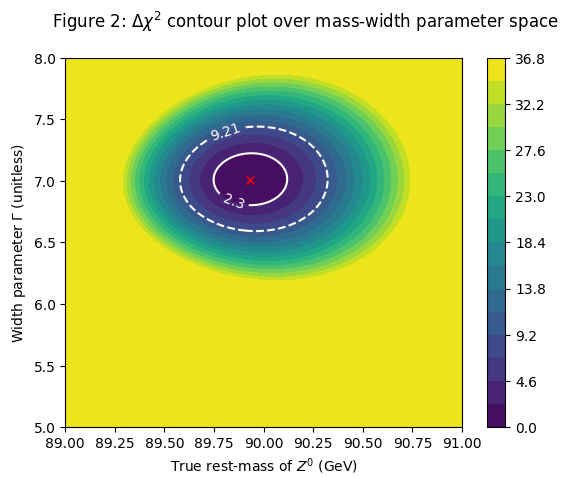

In [10]:
min = np.min(chis)
fig, ax = plt.subplots()
mx, my = np.meshgrid(masses, widths)
levels = np.linspace(0, 2.30 * 16, 17)
fig.colorbar(ax.contourf(mx, my, np.clip(chis - min, 0, 35), levels=levels))
ax.clabel(ax.contour(mx, my, np.clip(chis - min, 0, 35), levels=[2.30], colors="w"))
ax.clabel(ax.contour(mx, my, np.clip(chis - min, 0, 35), levels=[9.21], colors="w", linestyles="--"))
argmin = np.unravel_index(np.argmin(chis), chis.shape)
ax.plot(masses[argmin[1]], widths[argmin[0]], "xr")
ax.set_xlabel("True rest-mass of $Z^0$ (GeV)")
ax.set_ylabel(r"Width parameter $\Gamma$ (unitless)")
fig.suptitle(r"Figure 2: $\Delta\chi^2$ contour plot over mass-width parameter space");